In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

/home/AMANRAJ/anaconda2/envs/deep-learning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(output_dim=10 , init='uniform' , activation='sigmoid' , input_dim=19))
    classifier.add(Dense(output_dim=10 , init = 'uniform' , activation = 'sigmoid'))
    classifier.add(Dense(output_dim=1 , init = 'uniform' , activation = 'sigmoid'))
    classifier.compile(optimizer=optimizer , loss='binary_crossentropy' , metrics=['accuracy'])
    return classifier

In [3]:
df = pd.read_csv('input_large.txt' , sep = ',')
X = df.iloc[: , [0 , 1 , 2 , 3 , 4]].values
labelencoder_x=LabelEncoder()
for n in range(0,5):
    X[:,n]=labelencoder_x.fit_transform(X[:,n])
onehotencoder_x = OneHotEncoder(categorical_features=[0])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
onehotencoder_x = OneHotEncoder(categorical_features=[4])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
onehotencoder_x = OneHotEncoder(categorical_features=[8])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
onehotencoder_x = OneHotEncoder(categorical_features=[12])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
onehotencoder_x = OneHotEncoder(categorical_features=[16])
X = onehotencoder_x.fit_transform(X).toarray()
X = X[: , 1:]
y = df.iloc[: , 5].values
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25)

In [4]:
classifier = Sequential()
classifier.add(Dense(output_dim=10 , init='uniform' , activation='sigmoid' , input_dim=19))
classifier.add(Dense(output_dim=10 , init = 'uniform' , activation = 'sigmoid'))
classifier.add(Dense(output_dim=1 , init = 'uniform' , activation = 'sigmoid'))
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
"""classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'nb_epoch': [200, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_"""

/home/AMANRAJ/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=19, kernel_initializer="uniform", activation="sigmoid", units=10)`
  
/home/AMANRAJ/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=10)`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/AMANRAJ/anaconda2/envs/deep-learning/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=1)`
  after removing the cwd from sys.path.


"classifier = KerasClassifier(build_fn = build_classifier)\nparameters = {'batch_size': [25, 32],\n              'nb_epoch': [200, 500],\n              'optimizer': ['adam', 'rmsprop']}\ngrid_search = GridSearchCV(estimator = classifier,\n                           param_grid = parameters,\n                           scoring = 'accuracy',\n                           cv = 10)\ngrid_search = grid_search.fit(X_train, y_train)\nbest_parameters = grid_search.best_params_\nbest_accuracy = grid_search.best_score_"

In [5]:
qq = np.arange(20 , 100 , 2)
acc=[]
for x in qq:
    classifier.fit(X_train , y_train , batch_size = x , epochs = 250)
    y_pred = classifier.predict(X_test)
    for i in range(len(y_pred)):
        if y_pred[i] > 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    acc.append(accuracy_score(y_test,y_pred))

Epoch 1/250
1875/1875 [==============================] - 2s 865us/step - loss: 0.6330 - acc: 0.7637
Epoch 2/250
1875/1875 [==============================] - 0s 52us/step - loss: 0.5600 - acc: 0.7637
Epoch 3/250
1875/1875 [==============================] - 0s 52us/step - loss: 0.5462 - acc: 0.7637
Epoch 4/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.5438 - acc: 0.7637
Epoch 5/250
1875/1875 [==============================] - 0s 53us/step - loss: 0.5424 - acc: 0.7637
Epoch 6/250
1875/1875 [==============================] - 0s 53us/step - loss: 0.5411 - acc: 0.7637
Epoch 7/250
1875/1875 [==============================] - 0s 52us/step - loss: 0.5397 - acc: 0.7637
Epoch 8/250
1875/1875 [==============================] - 0s 53us/step - loss: 0.5381 - acc: 0.7637
Epoch 9/250
1875/1875 [==============================] - 0s 53us/step - loss: 0.5361 - acc: 0.7637
Epoch 10/250
1875/1875 [==============================] - 0s 52us/step - loss: 0.5342 - acc: 0.7637
Epoch 11

1875/1875 [==============================] - 0s 56us/step - loss: 0.4262 - acc: 0.7637
Epoch 84/250
1875/1875 [==============================] - 0s 56us/step - loss: 0.4260 - acc: 0.7637
Epoch 85/250
1875/1875 [==============================] - 0s 57us/step - loss: 0.4258 - acc: 0.7637
Epoch 86/250
1875/1875 [==============================] - 0s 56us/step - loss: 0.4258 - acc: 0.7637
Epoch 87/250
1875/1875 [==============================] - 0s 56us/step - loss: 0.4256 - acc: 0.7637
Epoch 88/250
1875/1875 [==============================] - 0s 56us/step - loss: 0.4254 - acc: 0.7637
Epoch 89/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.4255 - acc: 0.7637
Epoch 90/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.4253 - acc: 0.7637
Epoch 91/250
1875/1875 [==============================] - 0s 56us/step - loss: 0.4253 - acc: 0.7637
Epoch 92/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.4254 - acc: 0.7637
Epoch 93/250


1875/1875 [==============================] - 0s 57us/step - loss: 0.4216 - acc: 0.7637
Epoch 165/250
1875/1875 [==============================] - 0s 58us/step - loss: 0.4216 - acc: 0.7637
Epoch 166/250
1875/1875 [==============================] - 0s 59us/step - loss: 0.4215 - acc: 0.7637
Epoch 167/250
1875/1875 [==============================] - 0s 57us/step - loss: 0.4214 - acc: 0.7637
Epoch 168/250
1875/1875 [==============================] - 0s 58us/step - loss: 0.4214 - acc: 0.7637
Epoch 169/250
1875/1875 [==============================] - 0s 58us/step - loss: 0.4216 - acc: 0.7637
Epoch 170/250
1875/1875 [==============================] - 0s 59us/step - loss: 0.4214 - acc: 0.7637
Epoch 171/250
1875/1875 [==============================] - 0s 58us/step - loss: 0.4213 - acc: 0.7637
Epoch 172/250
1875/1875 [==============================] - 0s 58us/step - loss: 0.4212 - acc: 0.7637
Epoch 173/250
1875/1875 [==============================] - 0s 59us/step - loss: 0.4211 - acc: 0.7637
Epoc

1875/1875 [==============================] - 0s 61us/step - loss: 0.4108 - acc: 0.7637
Epoch 246/250
1875/1875 [==============================] - 0s 59us/step - loss: 0.4106 - acc: 0.7637
Epoch 247/250
1875/1875 [==============================] - 0s 61us/step - loss: 0.4102 - acc: 0.7637
Epoch 248/250
1875/1875 [==============================] - 0s 59us/step - loss: 0.4099 - acc: 0.7637
Epoch 249/250
1875/1875 [==============================] - 0s 61us/step - loss: 0.4098 - acc: 0.7637
Epoch 250/250
1875/1875 [==============================] - 0s 61us/step - loss: 0.4095 - acc: 0.7637
Epoch 1/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.4091 - acc: 0.7637
Epoch 2/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.4089 - acc: 0.7637
Epoch 3/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.4087 - acc: 0.7637
Epoch 4/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.4086 - acc: 0.7637
Epoch 5/250


1875/1875 [==============================] - 0s 54us/step - loss: 0.3927 - acc: 0.7621
Epoch 78/250
1875/1875 [==============================] - 0s 56us/step - loss: 0.3925 - acc: 0.7595
Epoch 79/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3924 - acc: 0.7621
Epoch 80/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3921 - acc: 0.7627
Epoch 81/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3919 - acc: 0.7632
Epoch 82/250
1875/1875 [==============================] - 0s 53us/step - loss: 0.3918 - acc: 0.7637
Epoch 83/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3916 - acc: 0.7611
Epoch 84/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.3914 - acc: 0.7605
Epoch 85/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.3913 - acc: 0.7616
Epoch 86/250
1875/1875 [==============================] - 0s 57us/step - loss: 0.3911 - acc: 0.7659
Epoch 87/250


1875/1875 [==============================] - 0s 53us/step - loss: 0.3809 - acc: 0.7600
Epoch 159/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3807 - acc: 0.7611
Epoch 160/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.3806 - acc: 0.7627
Epoch 161/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3804 - acc: 0.7611
Epoch 162/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3802 - acc: 0.7611
Epoch 163/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.3803 - acc: 0.7600
Epoch 164/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.3802 - acc: 0.7600
Epoch 165/250
1875/1875 [==============================] - 0s 55us/step - loss: 0.3799 - acc: 0.7595
Epoch 166/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3798 - acc: 0.7611
Epoch 167/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3797 - acc: 0.7616
Epoc

1875/1875 [==============================] - 0s 53us/step - loss: 0.3709 - acc: 0.7685
Epoch 240/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3706 - acc: 0.7701
Epoch 241/250
1875/1875 [==============================] - 0s 53us/step - loss: 0.3706 - acc: 0.7701
Epoch 242/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3706 - acc: 0.7696
Epoch 243/250
1875/1875 [==============================] - 0s 53us/step - loss: 0.3704 - acc: 0.7680
Epoch 244/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3702 - acc: 0.7685
Epoch 245/250
1875/1875 [==============================] - 0s 53us/step - loss: 0.3702 - acc: 0.7712
Epoch 246/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3700 - acc: 0.7685
Epoch 247/250
1875/1875 [==============================] - 0s 54us/step - loss: 0.3700 - acc: 0.7712
Epoch 248/250
1875/1875 [==============================] - 0s 53us/step - loss: 0.3698 - acc: 0.7701
Epoc

1875/1875 [==============================] - 0s 46us/step - loss: 0.3636 - acc: 0.7776
Epoch 72/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3634 - acc: 0.7765
Epoch 73/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3634 - acc: 0.7760
Epoch 74/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3633 - acc: 0.7781
Epoch 75/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3633 - acc: 0.7765
Epoch 76/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3633 - acc: 0.7749
Epoch 77/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3631 - acc: 0.7776
Epoch 78/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3631 - acc: 0.7760
Epoch 79/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3629 - acc: 0.7765
Epoch 80/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3631 - acc: 0.7771
Epoch 81/250


1875/1875 [==============================] - 0s 46us/step - loss: 0.3581 - acc: 0.7781
Epoch 153/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3582 - acc: 0.7797
Epoch 154/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3579 - acc: 0.7787
Epoch 155/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3580 - acc: 0.7787
Epoch 156/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3579 - acc: 0.7787
Epoch 157/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3578 - acc: 0.7792
Epoch 158/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3578 - acc: 0.7787
Epoch 159/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3577 - acc: 0.7797
Epoch 160/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3576 - acc: 0.7797
Epoch 161/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3576 - acc: 0.7787
Epoc

1875/1875 [==============================] - 0s 49us/step - loss: 0.3532 - acc: 0.7819
Epoch 234/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3531 - acc: 0.7808
Epoch 235/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3531 - acc: 0.7797
Epoch 236/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3530 - acc: 0.7792
Epoch 237/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3530 - acc: 0.7781
Epoch 238/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3530 - acc: 0.7787
Epoch 239/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3530 - acc: 0.7781
Epoch 240/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3530 - acc: 0.7797
Epoch 241/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3528 - acc: 0.7797
Epoch 242/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3528 - acc: 0.7808
Epoc

Epoch 65/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3481 - acc: 0.7851
Epoch 66/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3479 - acc: 0.7851
Epoch 67/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3479 - acc: 0.7893
Epoch 68/250
1875/1875 [==============================] - 0s 46us/step - loss: 0.3478 - acc: 0.7883
Epoch 69/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3477 - acc: 0.7888
Epoch 70/250
1875/1875 [==============================] - 0s 46us/step - loss: 0.3477 - acc: 0.7883
Epoch 71/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3476 - acc: 0.7883
Epoch 72/250
1875/1875 [==============================] - 0s 46us/step - loss: 0.3476 - acc: 0.7893
Epoch 73/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3475 - acc: 0.7872
Epoch 74/250
1875/1875 [==============================] - 0s 46us/step - loss: 0.3473 - acc: 0.7877


1875/1875 [==============================] - 0s 46us/step - loss: 0.3417 - acc: 0.7968
Epoch 147/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3416 - acc: 0.7979
Epoch 148/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3415 - acc: 0.7979
Epoch 149/250
1875/1875 [==============================] - 0s 46us/step - loss: 0.3415 - acc: 0.7968
Epoch 150/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3414 - acc: 0.7968
Epoch 151/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3413 - acc: 0.7973
Epoch 152/250
1875/1875 [==============================] - 0s 46us/step - loss: 0.3413 - acc: 0.7979
Epoch 153/250
1875/1875 [==============================] - 0s 46us/step - loss: 0.3411 - acc: 0.7979
Epoch 154/250
1875/1875 [==============================] - 0s 46us/step - loss: 0.3412 - acc: 0.8016
Epoch 155/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3410 - acc: 0.7984
Epoc

1875/1875 [==============================] - 0s 47us/step - loss: 0.3352 - acc: 0.8096
Epoch 228/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3353 - acc: 0.8091
Epoch 229/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3350 - acc: 0.8091
Epoch 230/250
1875/1875 [==============================] - 0s 49us/step - loss: 0.3351 - acc: 0.8069
Epoch 231/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3350 - acc: 0.8107
Epoch 232/250
1875/1875 [==============================] - 0s 48us/step - loss: 0.3348 - acc: 0.8075
Epoch 233/250
1875/1875 [==============================] - 0s 46us/step - loss: 0.3348 - acc: 0.8080
Epoch 234/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3347 - acc: 0.8091
Epoch 235/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3346 - acc: 0.8091
Epoch 236/250
1875/1875 [==============================] - 0s 47us/step - loss: 0.3345 - acc: 0.8080
Epoc

1875/1875 [==============================] - 0s 44us/step - loss: 0.3282 - acc: 0.8144
Epoch 59/250
1875/1875 [==============================] - 0s 43us/step - loss: 0.3281 - acc: 0.8160
Epoch 60/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3281 - acc: 0.8144
Epoch 61/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3280 - acc: 0.8149
Epoch 62/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3280 - acc: 0.8139
Epoch 63/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3277 - acc: 0.8139
Epoch 64/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3278 - acc: 0.8139
Epoch 65/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3277 - acc: 0.8133
Epoch 66/250
1875/1875 [==============================] - 0s 45us/step - loss: 0.3275 - acc: 0.8144
Epoch 67/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3274 - acc: 0.8133
Epoch 68/250


1875/1875 [==============================] - 0s 44us/step - loss: 0.3214 - acc: 0.8213
Epoch 140/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3215 - acc: 0.8208
Epoch 141/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3215 - acc: 0.8224
Epoch 142/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3214 - acc: 0.8219
Epoch 143/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3212 - acc: 0.8208
Epoch 144/250
1875/1875 [==============================] - 0s 43us/step - loss: 0.3212 - acc: 0.8213
Epoch 145/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3211 - acc: 0.8224
Epoch 146/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3209 - acc: 0.8213
Epoch 147/250
1875/1875 [==============================] - 0s 43us/step - loss: 0.3209 - acc: 0.8213
Epoch 148/250
1875/1875 [==============================] - 0s 43us/step - loss: 0.3208 - acc: 0.8224
Epoc

1875/1875 [==============================] - 0s 43us/step - loss: 0.3161 - acc: 0.8320
Epoch 221/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3161 - acc: 0.8320
Epoch 222/250
1875/1875 [==============================] - 0s 43us/step - loss: 0.3161 - acc: 0.8315
Epoch 223/250
1875/1875 [==============================] - 0s 43us/step - loss: 0.3160 - acc: 0.8325
Epoch 224/250
1875/1875 [==============================] - 0s 42us/step - loss: 0.3160 - acc: 0.8320
Epoch 225/250
1875/1875 [==============================] - 0s 43us/step - loss: 0.3159 - acc: 0.8325
Epoch 226/250
1875/1875 [==============================] - 0s 44us/step - loss: 0.3159 - acc: 0.8320
Epoch 227/250
1875/1875 [==============================] - 0s 43us/step - loss: 0.3160 - acc: 0.8315
Epoch 228/250
1875/1875 [==============================] - 0s 43us/step - loss: 0.3157 - acc: 0.8336
Epoch 229/250
1875/1875 [==============================] - 0s 41us/step - loss: 0.3156 - acc: 0.8331
Epoc

1875/1875 [==============================] - 0s 38us/step - loss: 0.3121 - acc: 0.8315
Epoch 52/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3120 - acc: 0.8331
Epoch 53/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3120 - acc: 0.8325
Epoch 54/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3119 - acc: 0.8325
Epoch 55/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3120 - acc: 0.8325
Epoch 56/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3121 - acc: 0.8309
Epoch 57/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3119 - acc: 0.8320
Epoch 58/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3120 - acc: 0.8320
Epoch 59/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.3117 - acc: 0.8320
Epoch 60/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3117 - acc: 0.8331
Epoch 61/250


1875/1875 [==============================] - 0s 38us/step - loss: 0.3087 - acc: 0.8347
Epoch 133/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3086 - acc: 0.8352
Epoch 134/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3086 - acc: 0.8357
Epoch 135/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3087 - acc: 0.8341
Epoch 136/250
1875/1875 [==============================] - 0s 40us/step - loss: 0.3086 - acc: 0.8352
Epoch 137/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3086 - acc: 0.8347
Epoch 138/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3084 - acc: 0.8352
Epoch 139/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3084 - acc: 0.8363
Epoch 140/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3083 - acc: 0.8347
Epoch 141/250
1875/1875 [==============================] - 0s 41us/step - loss: 0.3083 - acc: 0.8363
Epoc

1875/1875 [==============================] - 0s 41us/step - loss: 0.3056 - acc: 0.8363
Epoch 214/250
1875/1875 [==============================] - 0s 42us/step - loss: 0.3057 - acc: 0.8357
Epoch 215/250
1875/1875 [==============================] - 0s 41us/step - loss: 0.3055 - acc: 0.8347
Epoch 216/250
1875/1875 [==============================] - 0s 41us/step - loss: 0.3055 - acc: 0.8363
Epoch 217/250
1875/1875 [==============================] - 0s 41us/step - loss: 0.3055 - acc: 0.8357
Epoch 218/250
1875/1875 [==============================] - 0s 41us/step - loss: 0.3055 - acc: 0.8357
Epoch 219/250
1875/1875 [==============================] - 0s 41us/step - loss: 0.3055 - acc: 0.8363
Epoch 220/250
1875/1875 [==============================] - 0s 41us/step - loss: 0.3055 - acc: 0.8352
Epoch 221/250
1875/1875 [==============================] - 0s 41us/step - loss: 0.3054 - acc: 0.8347
Epoch 222/250
1875/1875 [==============================] - 0s 42us/step - loss: 0.3056 - acc: 0.8357
Epoc

1875/1875 [==============================] - 0s 39us/step - loss: 0.3033 - acc: 0.8379
Epoch 45/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3030 - acc: 0.8368
Epoch 46/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3030 - acc: 0.8357
Epoch 47/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3029 - acc: 0.8368
Epoch 48/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3029 - acc: 0.8363
Epoch 49/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3031 - acc: 0.8363
Epoch 50/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3029 - acc: 0.8373
Epoch 51/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3029 - acc: 0.8368
Epoch 52/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3028 - acc: 0.8373
Epoch 53/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3027 - acc: 0.8363
Epoch 54/250


1875/1875 [==============================] - 0s 39us/step - loss: 0.3006 - acc: 0.8363
Epoch 126/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3006 - acc: 0.8368
Epoch 127/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3006 - acc: 0.8363
Epoch 128/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3006 - acc: 0.8363
Epoch 129/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.3006 - acc: 0.8389
Epoch 130/250
1875/1875 [==============================] - 0s 40us/step - loss: 0.3004 - acc: 0.8363
Epoch 131/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3005 - acc: 0.8368
Epoch 132/250
1875/1875 [==============================] - 0s 40us/step - loss: 0.3003 - acc: 0.8363
Epoch 133/250
1875/1875 [==============================] - 0s 40us/step - loss: 0.3007 - acc: 0.8357
Epoch 134/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.3005 - acc: 0.8373
Epoc

1875/1875 [==============================] - 0s 38us/step - loss: 0.2983 - acc: 0.8416
Epoch 207/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.2982 - acc: 0.8405
Epoch 208/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.2983 - acc: 0.8395
Epoch 209/250
1875/1875 [==============================] - 0s 40us/step - loss: 0.2981 - acc: 0.8405
Epoch 210/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.2983 - acc: 0.8416
Epoch 211/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.2982 - acc: 0.8400
Epoch 212/250
1875/1875 [==============================] - 0s 40us/step - loss: 0.2982 - acc: 0.8400
Epoch 213/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.2981 - acc: 0.8411
Epoch 214/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.2980 - acc: 0.8416
Epoch 215/250
1875/1875 [==============================] - 0s 40us/step - loss: 0.2981 - acc: 0.8405
Epoc

1875/1875 [==============================] - 0s 36us/step - loss: 0.2959 - acc: 0.8453
Epoch 38/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2959 - acc: 0.8459
Epoch 39/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2959 - acc: 0.8453
Epoch 40/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2958 - acc: 0.8459
Epoch 41/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2959 - acc: 0.8448
Epoch 42/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2957 - acc: 0.8464
Epoch 43/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2957 - acc: 0.8464
Epoch 44/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2958 - acc: 0.8469
Epoch 45/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2956 - acc: 0.8453
Epoch 46/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.2957 - acc: 0.8459
Epoch 47/250


1875/1875 [==============================] - 0s 36us/step - loss: 0.2938 - acc: 0.8480
Epoch 119/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2937 - acc: 0.8507
Epoch 120/250
1875/1875 [==============================] - 0s 38us/step - loss: 0.2936 - acc: 0.8501
Epoch 121/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2936 - acc: 0.8501
Epoch 122/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2936 - acc: 0.8491
Epoch 123/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2934 - acc: 0.8496
Epoch 124/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2934 - acc: 0.8507
Epoch 125/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2934 - acc: 0.8501
Epoch 126/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2934 - acc: 0.8496
Epoch 127/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2934 - acc: 0.8496
Epoc

1875/1875 [==============================] - 0s 36us/step - loss: 0.2914 - acc: 0.8512
Epoch 200/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2914 - acc: 0.8517
Epoch 201/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2915 - acc: 0.8523
Epoch 202/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2914 - acc: 0.8496
Epoch 203/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2915 - acc: 0.8485
Epoch 204/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2913 - acc: 0.8507
Epoch 205/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2915 - acc: 0.8512
Epoch 206/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2913 - acc: 0.8501
Epoch 207/250
1875/1875 [==============================] - 0s 39us/step - loss: 0.2912 - acc: 0.8485
Epoch 208/250
1875/1875 [==============================] - 0s 37us/step - loss: 0.2916 - acc: 0.8485
Epoc

1875/1875 [==============================] - 0s 34us/step - loss: 0.2895 - acc: 0.8496
Epoch 31/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2894 - acc: 0.8496
Epoch 32/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2895 - acc: 0.8485
Epoch 33/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2893 - acc: 0.8485
Epoch 34/250
1875/1875 [==============================] - 0s 34us/step - loss: 0.2894 - acc: 0.8501
Epoch 35/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2893 - acc: 0.8507
Epoch 36/250
1875/1875 [==============================] - 0s 34us/step - loss: 0.2894 - acc: 0.8501
Epoch 37/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2894 - acc: 0.8491
Epoch 38/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2892 - acc: 0.8512
Epoch 39/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2893 - acc: 0.8501
Epoch 40/250


1875/1875 [==============================] - 0s 34us/step - loss: 0.2875 - acc: 0.8517
Epoch 112/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2877 - acc: 0.8523
Epoch 113/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2875 - acc: 0.8517
Epoch 114/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2874 - acc: 0.8517
Epoch 115/250
1875/1875 [==============================] - 0s 34us/step - loss: 0.2874 - acc: 0.8517
Epoch 116/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2874 - acc: 0.8507
Epoch 117/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2874 - acc: 0.8523
Epoch 118/250
1875/1875 [==============================] - 0s 34us/step - loss: 0.2875 - acc: 0.8517
Epoch 119/250
1875/1875 [==============================] - 0s 34us/step - loss: 0.2875 - acc: 0.8491
Epoch 120/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2874 - acc: 0.8512
Epoc

1875/1875 [==============================] - 0s 36us/step - loss: 0.2855 - acc: 0.8512
Epoch 193/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2855 - acc: 0.8517
Epoch 194/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2855 - acc: 0.8523
Epoch 195/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2855 - acc: 0.8517
Epoch 196/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2855 - acc: 0.8512
Epoch 197/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2857 - acc: 0.8507
Epoch 198/250
1875/1875 [==============================] - 0s 34us/step - loss: 0.2854 - acc: 0.8523
Epoch 199/250
1875/1875 [==============================] - 0s 36us/step - loss: 0.2855 - acc: 0.8512
Epoch 200/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2854 - acc: 0.8512
Epoch 201/250
1875/1875 [==============================] - 0s 35us/step - loss: 0.2854 - acc: 0.8507
Epoc

1875/1875 [==============================] - 0s 33us/step - loss: 0.2836 - acc: 0.8512
Epoch 24/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2835 - acc: 0.8544
Epoch 25/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2837 - acc: 0.8523
Epoch 26/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2836 - acc: 0.8560
Epoch 27/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2836 - acc: 0.8560
Epoch 28/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2836 - acc: 0.8533
Epoch 29/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2835 - acc: 0.8544
Epoch 30/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2836 - acc: 0.8549
Epoch 31/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2835 - acc: 0.8544
Epoch 32/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2835 - acc: 0.8539
Epoch 33/250


1875/1875 [==============================] - 0s 33us/step - loss: 0.2819 - acc: 0.8565
Epoch 106/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2820 - acc: 0.8560
Epoch 107/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2819 - acc: 0.8560
Epoch 108/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2818 - acc: 0.8571
Epoch 109/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2819 - acc: 0.8565
Epoch 110/250
1875/1875 [==============================] - 0s 34us/step - loss: 0.2818 - acc: 0.8565
Epoch 111/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2818 - acc: 0.8571
Epoch 112/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2819 - acc: 0.8571
Epoch 113/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2816 - acc: 0.8560
Epoch 114/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2817 - acc: 0.8555
Epoc

1875/1875 [==============================] - 0s 34us/step - loss: 0.2803 - acc: 0.8565
Epoch 187/250
1875/1875 [==============================] - 0s 34us/step - loss: 0.2800 - acc: 0.8592
Epoch 188/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2801 - acc: 0.8597
Epoch 189/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2800 - acc: 0.8581
Epoch 190/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2800 - acc: 0.8603
Epoch 191/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2800 - acc: 0.8587
Epoch 192/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2800 - acc: 0.8603
Epoch 193/250
1875/1875 [==============================] - 0s 34us/step - loss: 0.2801 - acc: 0.8587
Epoch 194/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2799 - acc: 0.8581
Epoch 195/250
1875/1875 [==============================] - 0s 33us/step - loss: 0.2798 - acc: 0.8581
Epoc

1875/1875 [==============================] - 0s 32us/step - loss: 0.2787 - acc: 0.8581
Epoch 18/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2786 - acc: 0.8571
Epoch 19/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2786 - acc: 0.8592
Epoch 20/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2786 - acc: 0.8576
Epoch 21/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2786 - acc: 0.8597
Epoch 22/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2786 - acc: 0.8592
Epoch 23/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2785 - acc: 0.8587
Epoch 24/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2786 - acc: 0.8581
Epoch 25/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2786 - acc: 0.8603
Epoch 26/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2784 - acc: 0.8592
Epoch 27/250


1875/1875 [==============================] - 0s 30us/step - loss: 0.2774 - acc: 0.8597
Epoch 100/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2772 - acc: 0.8592
Epoch 101/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2772 - acc: 0.8592
Epoch 102/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2773 - acc: 0.8592
Epoch 103/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2772 - acc: 0.8576
Epoch 104/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2771 - acc: 0.8587
Epoch 105/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2773 - acc: 0.8581
Epoch 106/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2772 - acc: 0.8608
Epoch 107/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2772 - acc: 0.8581
Epoch 108/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2772 - acc: 0.8603
Epoc

1875/1875 [==============================] - 0s 32us/step - loss: 0.2760 - acc: 0.8592
Epoch 181/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2759 - acc: 0.8603
Epoch 182/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2759 - acc: 0.8592
Epoch 183/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2759 - acc: 0.8597
Epoch 184/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2759 - acc: 0.8597
Epoch 185/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2759 - acc: 0.8597
Epoch 186/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2759 - acc: 0.8592
Epoch 187/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2758 - acc: 0.8592
Epoch 188/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2758 - acc: 0.8597
Epoch 189/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2758 - acc: 0.8587
Epoc

1875/1875 [==============================] - 0s 30us/step - loss: 0.2745 - acc: 0.8624
Epoch 12/250
1875/1875 [==============================] - 0s 29us/step - loss: 0.2745 - acc: 0.8613
Epoch 13/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2745 - acc: 0.8608
Epoch 14/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2745 - acc: 0.8613
Epoch 15/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2745 - acc: 0.8624
Epoch 16/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2744 - acc: 0.8608
Epoch 17/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2744 - acc: 0.8608
Epoch 18/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2744 - acc: 0.8619
Epoch 19/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2745 - acc: 0.8619
Epoch 20/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2743 - acc: 0.8603
Epoch 21/250


1875/1875 [==============================] - 0s 31us/step - loss: 0.2727 - acc: 0.8624
Epoch 94/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2727 - acc: 0.8613
Epoch 95/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2726 - acc: 0.8624
Epoch 96/250
1875/1875 [==============================] - 0s 29us/step - loss: 0.2726 - acc: 0.8619
Epoch 97/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2727 - acc: 0.8619
Epoch 98/250
1875/1875 [==============================] - 0s 29us/step - loss: 0.2727 - acc: 0.8624
Epoch 99/250
1875/1875 [==============================] - 0s 31us/step - loss: 0.2726 - acc: 0.8624
Epoch 100/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2725 - acc: 0.8613
Epoch 101/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2725 - acc: 0.8613
Epoch 102/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2725 - acc: 0.8619
Epoch 103/

1875/1875 [==============================] - 0s 30us/step - loss: 0.2703 - acc: 0.8640
Epoch 175/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2702 - acc: 0.8635
Epoch 176/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2703 - acc: 0.8635
Epoch 177/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2703 - acc: 0.8640
Epoch 178/250
1875/1875 [==============================] - 0s 32us/step - loss: 0.2703 - acc: 0.8640
Epoch 179/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2701 - acc: 0.8651
Epoch 180/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2702 - acc: 0.8635
Epoch 181/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2701 - acc: 0.8645
Epoch 182/250
1875/1875 [==============================] - 0s 30us/step - loss: 0.2701 - acc: 0.8645
Epoch 183/250
1875/1875 [==============================] - 0s 29us/step - loss: 0.2701 - acc: 0.8651
Epoc

1875/1875 [==============================] - 0s 27us/step - loss: 0.2682 - acc: 0.8661
Epoch 6/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2682 - acc: 0.8656
Epoch 7/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2682 - acc: 0.8656
Epoch 8/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2682 - acc: 0.8651
Epoch 9/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2681 - acc: 0.8672
Epoch 10/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2681 - acc: 0.8661
Epoch 11/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2681 - acc: 0.8661
Epoch 12/250
1875/1875 [==============================] - 0s 29us/step - loss: 0.2680 - acc: 0.8656
Epoch 13/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2680 - acc: 0.8645
Epoch 14/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2680 - acc: 0.8667
Epoch 15/250
1875

1875/1875 [==============================] - 0s 29us/step - loss: 0.2666 - acc: 0.8688
Epoch 88/250
1875/1875 [==============================] - 0s 29us/step - loss: 0.2665 - acc: 0.8688
Epoch 89/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2665 - acc: 0.8683
Epoch 90/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2664 - acc: 0.8683
Epoch 91/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2665 - acc: 0.8699
Epoch 92/250
1875/1875 [==============================] - 0s 29us/step - loss: 0.2664 - acc: 0.8683
Epoch 93/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2664 - acc: 0.8688
Epoch 94/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2663 - acc: 0.8677
Epoch 95/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2663 - acc: 0.8677
Epoch 96/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2663 - acc: 0.8688
Epoch 97/250


1875/1875 [==============================] - 0s 27us/step - loss: 0.2650 - acc: 0.8709
Epoch 169/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2649 - acc: 0.8704
Epoch 170/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2650 - acc: 0.8704
Epoch 171/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2648 - acc: 0.8699
Epoch 172/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2648 - acc: 0.8704
Epoch 173/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2649 - acc: 0.8704
Epoch 174/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2648 - acc: 0.8699
Epoch 175/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2647 - acc: 0.8704
Epoch 176/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2648 - acc: 0.8693
Epoch 177/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2647 - acc: 0.8709
Epoc

1875/1875 [==============================] - 0s 29us/step - loss: 0.2635 - acc: 0.8704
Epoch 250/250
1875/1875 [==============================] - 0s 29us/step - loss: 0.2634 - acc: 0.8720
Epoch 1/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2634 - acc: 0.8725
Epoch 2/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2634 - acc: 0.8741
Epoch 3/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2633 - acc: 0.8731
Epoch 4/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2633 - acc: 0.8725
Epoch 5/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2635 - acc: 0.8731
Epoch 6/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2633 - acc: 0.8731
Epoch 7/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2632 - acc: 0.8731
Epoch 8/250
1875/1875 [==============================] - 0s 29us/step - loss: 0.2632 - acc: 0.8736
Epoch 9/250
1875/187

1875/1875 [==============================] - 0s 26us/step - loss: 0.2620 - acc: 0.8731
Epoch 82/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2620 - acc: 0.8736
Epoch 83/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2620 - acc: 0.8725
Epoch 84/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2620 - acc: 0.8731
Epoch 85/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2620 - acc: 0.8731
Epoch 86/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2618 - acc: 0.8731
Epoch 87/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2619 - acc: 0.8725
Epoch 88/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2620 - acc: 0.8720
Epoch 89/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2618 - acc: 0.8725
Epoch 90/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2619 - acc: 0.8741
Epoch 91/250


1875/1875 [==============================] - 0s 27us/step - loss: 0.2606 - acc: 0.8741
Epoch 163/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2606 - acc: 0.8747
Epoch 164/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2606 - acc: 0.8736
Epoch 165/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2605 - acc: 0.8747
Epoch 166/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2605 - acc: 0.8741
Epoch 167/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2606 - acc: 0.8741
Epoch 168/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2604 - acc: 0.8752
Epoch 169/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2605 - acc: 0.8752
Epoch 170/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2605 - acc: 0.8747
Epoch 171/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2605 - acc: 0.8747
Epoc

1875/1875 [==============================] - 0s 26us/step - loss: 0.2594 - acc: 0.8757
Epoch 244/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2593 - acc: 0.8757
Epoch 245/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2593 - acc: 0.8747
Epoch 246/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2592 - acc: 0.8757
Epoch 247/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2592 - acc: 0.8757
Epoch 248/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2592 - acc: 0.8757
Epoch 249/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2592 - acc: 0.8763
Epoch 250/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2592 - acc: 0.8768
Epoch 1/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2592 - acc: 0.8757
Epoch 2/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2592 - acc: 0.8757
Epoch 3/

1875/1875 [==============================] - 0s 27us/step - loss: 0.2582 - acc: 0.8773
Epoch 76/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2581 - acc: 0.8789
Epoch 77/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2581 - acc: 0.8784
Epoch 78/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2582 - acc: 0.8773
Epoch 79/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2581 - acc: 0.8779
Epoch 80/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2581 - acc: 0.8784
Epoch 81/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2581 - acc: 0.8795
Epoch 82/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2581 - acc: 0.8789
Epoch 83/250
1875/1875 [==============================] - 0s 28us/step - loss: 0.2581 - acc: 0.8789
Epoch 84/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2581 - acc: 0.8784
Epoch 85/250


1875/1875 [==============================] - 0s 26us/step - loss: 0.2572 - acc: 0.8789
Epoch 157/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2571 - acc: 0.8784
Epoch 158/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2571 - acc: 0.8784
Epoch 159/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2571 - acc: 0.8784
Epoch 160/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2571 - acc: 0.8784
Epoch 161/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2571 - acc: 0.8789
Epoch 162/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2571 - acc: 0.8784
Epoch 163/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2570 - acc: 0.8784
Epoch 164/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2570 - acc: 0.8789
Epoch 165/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2572 - acc: 0.8784
Epoc

1875/1875 [==============================] - 0s 26us/step - loss: 0.2561 - acc: 0.8800
Epoch 238/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2562 - acc: 0.8805
Epoch 239/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2561 - acc: 0.8805
Epoch 240/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2561 - acc: 0.8795
Epoch 241/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2561 - acc: 0.8795
Epoch 242/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2561 - acc: 0.8800
Epoch 243/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2561 - acc: 0.8805
Epoch 244/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2561 - acc: 0.8800
Epoch 245/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2561 - acc: 0.8800
Epoch 246/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2561 - acc: 0.8784
Epoc

1875/1875 [==============================] - 0s 25us/step - loss: 0.2552 - acc: 0.8821
Epoch 70/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2553 - acc: 0.8821
Epoch 71/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2551 - acc: 0.8821
Epoch 72/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2551 - acc: 0.8811
Epoch 73/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2551 - acc: 0.8821
Epoch 74/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2551 - acc: 0.8816
Epoch 75/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2551 - acc: 0.8816
Epoch 76/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2551 - acc: 0.8816
Epoch 77/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2551 - acc: 0.8811
Epoch 78/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2550 - acc: 0.8816
Epoch 79/250


1875/1875 [==============================] - 0s 25us/step - loss: 0.2543 - acc: 0.8827
Epoch 151/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2542 - acc: 0.8827
Epoch 152/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2542 - acc: 0.8827
Epoch 153/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2542 - acc: 0.8827
Epoch 154/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2542 - acc: 0.8811
Epoch 155/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2542 - acc: 0.8821
Epoch 156/250
1875/1875 [==============================] - 0s 26us/step - loss: 0.2542 - acc: 0.8821
Epoch 157/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2543 - acc: 0.8821
Epoch 158/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2542 - acc: 0.8827
Epoch 159/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2542 - acc: 0.8821
Epoc

1875/1875 [==============================] - 0s 24us/step - loss: 0.2533 - acc: 0.8821
Epoch 232/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2533 - acc: 0.8816
Epoch 233/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2532 - acc: 0.8816
Epoch 234/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2532 - acc: 0.8816
Epoch 235/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2532 - acc: 0.8821
Epoch 236/250
1875/1875 [==============================] - 0s 27us/step - loss: 0.2533 - acc: 0.8821
Epoch 237/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2532 - acc: 0.8816
Epoch 238/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2532 - acc: 0.8811
Epoch 239/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2532 - acc: 0.8821
Epoch 240/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2533 - acc: 0.8827
Epoc

Epoch 63/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2523 - acc: 0.8795
Epoch 64/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2523 - acc: 0.8816
Epoch 65/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2524 - acc: 0.8816
Epoch 66/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2523 - acc: 0.8827
Epoch 67/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2522 - acc: 0.8832
Epoch 68/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2522 - acc: 0.8821
Epoch 69/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2522 - acc: 0.8827
Epoch 70/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2522 - acc: 0.8816
Epoch 71/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2522 - acc: 0.8816
Epoch 72/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2522 - acc: 0.8816


1875/1875 [==============================] - 0s 24us/step - loss: 0.2510 - acc: 0.8827
Epoch 145/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2510 - acc: 0.8827
Epoch 146/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2510 - acc: 0.8827
Epoch 147/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2510 - acc: 0.8821
Epoch 148/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2511 - acc: 0.8816
Epoch 149/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2510 - acc: 0.8816
Epoch 150/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2510 - acc: 0.8832
Epoch 151/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2509 - acc: 0.8832
Epoch 152/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2509 - acc: 0.8827
Epoch 153/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2509 - acc: 0.8821
Epoc

1875/1875 [==============================] - 0s 24us/step - loss: 0.2498 - acc: 0.8827
Epoch 226/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2498 - acc: 0.8843
Epoch 227/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2497 - acc: 0.8832
Epoch 228/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2497 - acc: 0.8843
Epoch 229/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2498 - acc: 0.8848
Epoch 230/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2497 - acc: 0.8859
Epoch 231/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2497 - acc: 0.8827
Epoch 232/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2497 - acc: 0.8853
Epoch 233/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2496 - acc: 0.8837
Epoch 234/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2497 - acc: 0.8843
Epoc

1875/1875 [==============================] - 0s 22us/step - loss: 0.2483 - acc: 0.8832
Epoch 57/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2482 - acc: 0.8837
Epoch 58/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2482 - acc: 0.8837
Epoch 59/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2482 - acc: 0.8837
Epoch 60/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2482 - acc: 0.8832
Epoch 61/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2482 - acc: 0.8837
Epoch 62/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2482 - acc: 0.8837
Epoch 63/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2483 - acc: 0.8837
Epoch 64/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2481 - acc: 0.8832
Epoch 65/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2482 - acc: 0.8837
Epoch 66/250


1875/1875 [==============================] - 0s 23us/step - loss: 0.2467 - acc: 0.8843
Epoch 138/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2466 - acc: 0.8843
Epoch 139/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2467 - acc: 0.8827
Epoch 140/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2465 - acc: 0.8832
Epoch 141/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2465 - acc: 0.8837
Epoch 142/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2465 - acc: 0.8837
Epoch 143/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2465 - acc: 0.8837
Epoch 144/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2465 - acc: 0.8837
Epoch 145/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2464 - acc: 0.8848
Epoch 146/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2464 - acc: 0.8832
Epoc

1875/1875 [==============================] - 0s 23us/step - loss: 0.2444 - acc: 0.8875
Epoch 219/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2444 - acc: 0.8885
Epoch 220/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2444 - acc: 0.8875
Epoch 221/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2443 - acc: 0.8880
Epoch 222/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2444 - acc: 0.8891
Epoch 223/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2443 - acc: 0.8880
Epoch 224/250
1875/1875 [==============================] - 0s 25us/step - loss: 0.2441 - acc: 0.8880
Epoch 225/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2440 - acc: 0.8885
Epoch 226/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2440 - acc: 0.8885
Epoch 227/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2440 - acc: 0.8891
Epoc

1875/1875 [==============================] - 0s 23us/step - loss: 0.2397 - acc: 0.8891
Epoch 50/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2397 - acc: 0.8885
Epoch 51/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2396 - acc: 0.8880
Epoch 52/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2396 - acc: 0.8880
Epoch 53/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2394 - acc: 0.8880
Epoch 54/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2394 - acc: 0.8885
Epoch 55/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2394 - acc: 0.8891
Epoch 56/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2393 - acc: 0.8885
Epoch 57/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2392 - acc: 0.8875
Epoch 58/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2391 - acc: 0.8896
Epoch 59/250


1875/1875 [==============================] - 0s 22us/step - loss: 0.2349 - acc: 0.8864
Epoch 131/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2348 - acc: 0.8864
Epoch 132/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2348 - acc: 0.8859
Epoch 133/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2347 - acc: 0.8864
Epoch 134/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2347 - acc: 0.8853
Epoch 135/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2346 - acc: 0.8859
Epoch 136/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2346 - acc: 0.8869
Epoch 137/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2346 - acc: 0.8859
Epoch 138/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2344 - acc: 0.8864
Epoch 139/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2343 - acc: 0.8875
Epoc

1875/1875 [==============================] - 0s 23us/step - loss: 0.2317 - acc: 0.8896
Epoch 212/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2317 - acc: 0.8891
Epoch 213/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2314 - acc: 0.8896
Epoch 214/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2315 - acc: 0.8901
Epoch 215/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2314 - acc: 0.8907
Epoch 216/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2313 - acc: 0.8907
Epoch 217/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2313 - acc: 0.8896
Epoch 218/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2313 - acc: 0.8896
Epoch 219/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2313 - acc: 0.8896
Epoch 220/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2313 - acc: 0.8907
Epoc

1875/1875 [==============================] - 0s 22us/step - loss: 0.2293 - acc: 0.8912
Epoch 43/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2294 - acc: 0.8917
Epoch 44/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2293 - acc: 0.8912
Epoch 45/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2293 - acc: 0.8912
Epoch 46/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2293 - acc: 0.8907
Epoch 47/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2294 - acc: 0.8912
Epoch 48/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2293 - acc: 0.8907
Epoch 49/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2292 - acc: 0.8912
Epoch 50/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2292 - acc: 0.8912
Epoch 51/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2292 - acc: 0.8901
Epoch 52/250


1875/1875 [==============================] - 0s 22us/step - loss: 0.2277 - acc: 0.8912
Epoch 124/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2277 - acc: 0.8907
Epoch 125/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2277 - acc: 0.8907
Epoch 126/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2276 - acc: 0.8901
Epoch 127/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2277 - acc: 0.8907
Epoch 128/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2276 - acc: 0.8907
Epoch 129/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2276 - acc: 0.8907
Epoch 130/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2278 - acc: 0.8901
Epoch 131/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2275 - acc: 0.8907
Epoch 132/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2275 - acc: 0.8891
Epoc

1875/1875 [==============================] - 0s 22us/step - loss: 0.2263 - acc: 0.8917
Epoch 205/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2263 - acc: 0.8907
Epoch 206/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2263 - acc: 0.8912
Epoch 207/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2263 - acc: 0.8912
Epoch 208/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2262 - acc: 0.8907
Epoch 209/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2263 - acc: 0.8917
Epoch 210/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2262 - acc: 0.8912
Epoch 211/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2262 - acc: 0.8912
Epoch 212/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2262 - acc: 0.8907
Epoch 213/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2262 - acc: 0.8912
Epoc

1875/1875 [==============================] - 0s 22us/step - loss: 0.2251 - acc: 0.8917
Epoch 36/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2251 - acc: 0.8923
Epoch 37/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2250 - acc: 0.8923
Epoch 38/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2250 - acc: 0.8923
Epoch 39/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2250 - acc: 0.8928
Epoch 40/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2250 - acc: 0.8928
Epoch 41/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2250 - acc: 0.8923
Epoch 42/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2250 - acc: 0.8917
Epoch 43/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2250 - acc: 0.8923
Epoch 44/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2250 - acc: 0.8917
Epoch 45/250


1875/1875 [==============================] - 0s 21us/step - loss: 0.2241 - acc: 0.8912
Epoch 117/250
1875/1875 [==============================] - 0s 24us/step - loss: 0.2240 - acc: 0.8901
Epoch 118/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2241 - acc: 0.8912
Epoch 119/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2240 - acc: 0.8907
Epoch 120/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2240 - acc: 0.8912
Epoch 121/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2240 - acc: 0.8901
Epoch 122/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2240 - acc: 0.8912
Epoch 123/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2240 - acc: 0.8912
Epoch 124/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2239 - acc: 0.8912
Epoch 125/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2239 - acc: 0.8917
Epoc

1875/1875 [==============================] - 0s 21us/step - loss: 0.2232 - acc: 0.8933
Epoch 198/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2232 - acc: 0.8923
Epoch 199/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2232 - acc: 0.8907
Epoch 200/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2231 - acc: 0.8923
Epoch 201/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2231 - acc: 0.8923
Epoch 202/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2231 - acc: 0.8939
Epoch 203/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2231 - acc: 0.8907
Epoch 204/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2231 - acc: 0.8928
Epoch 205/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2231 - acc: 0.8917
Epoch 206/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2230 - acc: 0.8917
Epoc

1875/1875 [==============================] - 0s 20us/step - loss: 0.2222 - acc: 0.8917
Epoch 29/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2222 - acc: 0.8917
Epoch 30/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2222 - acc: 0.8912
Epoch 31/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2222 - acc: 0.8917
Epoch 32/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2222 - acc: 0.8917
Epoch 33/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2222 - acc: 0.8923
Epoch 34/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2222 - acc: 0.8912
Epoch 35/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2222 - acc: 0.8917
Epoch 36/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2221 - acc: 0.8923
Epoch 37/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2222 - acc: 0.8917
Epoch 38/250


Epoch 110/250
1875/1875 [==============================] - 0s 23us/step - loss: 0.2215 - acc: 0.8907
Epoch 111/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2214 - acc: 0.8917
Epoch 112/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2214 - acc: 0.8907
Epoch 113/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2213 - acc: 0.8912
Epoch 114/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2215 - acc: 0.8896
Epoch 115/250
1875/1875 [==============================] - 0s 22us/step - loss: 0.2214 - acc: 0.8907
Epoch 116/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2214 - acc: 0.8912
Epoch 117/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2214 - acc: 0.8907
Epoch 118/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2214 - acc: 0.8907
Epoch 119/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2213 - ac

1875/1875 [==============================] - 0s 21us/step - loss: 0.2205 - acc: 0.8912
Epoch 192/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2206 - acc: 0.8917
Epoch 193/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2205 - acc: 0.8917
Epoch 194/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2205 - acc: 0.8917
Epoch 195/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2205 - acc: 0.8907
Epoch 196/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2205 - acc: 0.8896
Epoch 197/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2205 - acc: 0.8907
Epoch 198/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2205 - acc: 0.8901
Epoch 199/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2205 - acc: 0.8901
Epoch 200/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2205 - acc: 0.8912
Epoc

1875/1875 [==============================] - 0s 19us/step - loss: 0.2195 - acc: 0.8907
Epoch 23/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2195 - acc: 0.8907
Epoch 24/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2195 - acc: 0.8912
Epoch 25/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2195 - acc: 0.8912
Epoch 26/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2195 - acc: 0.8901
Epoch 27/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2195 - acc: 0.8912
Epoch 28/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2194 - acc: 0.8912
Epoch 29/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2194 - acc: 0.8917
Epoch 30/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2195 - acc: 0.8917
Epoch 31/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2194 - acc: 0.8912
Epoch 32/250


1875/1875 [==============================] - 0s 22us/step - loss: 0.2185 - acc: 0.8923
Epoch 105/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2185 - acc: 0.8917
Epoch 106/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2184 - acc: 0.8917
Epoch 107/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2184 - acc: 0.8907
Epoch 108/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2185 - acc: 0.8917
Epoch 109/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2186 - acc: 0.8907
Epoch 110/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2184 - acc: 0.8917
Epoch 111/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2185 - acc: 0.8901
Epoch 112/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2184 - acc: 0.8907
Epoch 113/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2185 - acc: 0.8923
Epoc

1875/1875 [==============================] - 0s 20us/step - loss: 0.2177 - acc: 0.8917
Epoch 186/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2176 - acc: 0.8917
Epoch 187/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2175 - acc: 0.8917
Epoch 188/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2176 - acc: 0.8917
Epoch 189/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2175 - acc: 0.8923
Epoch 190/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2176 - acc: 0.8923
Epoch 191/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2176 - acc: 0.8928
Epoch 192/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2176 - acc: 0.8923
Epoch 193/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2176 - acc: 0.8933
Epoch 194/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2175 - acc: 0.8928
Epoc

1875/1875 [==============================] - 0s 20us/step - loss: 0.2167 - acc: 0.8933
Epoch 17/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2168 - acc: 0.8939
Epoch 18/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2167 - acc: 0.8944
Epoch 19/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2167 - acc: 0.8933
Epoch 20/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2167 - acc: 0.8939
Epoch 21/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2167 - acc: 0.8939
Epoch 22/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2167 - acc: 0.8933
Epoch 23/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2167 - acc: 0.8928
Epoch 24/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2167 - acc: 0.8939
Epoch 25/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2167 - acc: 0.8939
Epoch 26/250


1875/1875 [==============================] - 0s 19us/step - loss: 0.2161 - acc: 0.8944
Epoch 99/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2159 - acc: 0.8944
Epoch 100/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2158 - acc: 0.8944
Epoch 101/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2158 - acc: 0.8949
Epoch 102/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2158 - acc: 0.8949
Epoch 103/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2159 - acc: 0.8944
Epoch 104/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2159 - acc: 0.8949
Epoch 105/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2158 - acc: 0.8949
Epoch 106/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2158 - acc: 0.8944
Epoch 107/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2157 - acc: 0.8949
Epoch

1875/1875 [==============================] - 0s 20us/step - loss: 0.2149 - acc: 0.8949
Epoch 180/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2149 - acc: 0.8949
Epoch 181/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2150 - acc: 0.8949
Epoch 182/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2151 - acc: 0.8944
Epoch 183/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2149 - acc: 0.8949
Epoch 184/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2150 - acc: 0.8928
Epoch 185/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2149 - acc: 0.8949
Epoch 186/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2149 - acc: 0.8949
Epoch 187/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2149 - acc: 0.8944
Epoch 188/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2149 - acc: 0.8949
Epoc

1875/1875 [==============================] - 0s 19us/step - loss: 0.2141 - acc: 0.8933
Epoch 11/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2141 - acc: 0.8928
Epoch 12/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2141 - acc: 0.8933
Epoch 13/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2141 - acc: 0.8917
Epoch 14/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2140 - acc: 0.8928
Epoch 15/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2141 - acc: 0.8933
Epoch 16/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2140 - acc: 0.8933
Epoch 17/250
1875/1875 [==============================] - 0s 21us/step - loss: 0.2141 - acc: 0.8928
Epoch 18/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2140 - acc: 0.8923
Epoch 19/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2140 - acc: 0.8928
Epoch 20/250


1875/1875 [==============================] - 0s 18us/step - loss: 0.2132 - acc: 0.8933
Epoch 93/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2132 - acc: 0.8923
Epoch 94/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2132 - acc: 0.8933
Epoch 95/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2132 - acc: 0.8923
Epoch 96/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2131 - acc: 0.8923
Epoch 97/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2131 - acc: 0.8923
Epoch 98/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2131 - acc: 0.8923
Epoch 99/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2131 - acc: 0.8928
Epoch 100/250
1875/1875 [==============================] - 0s 20us/step - loss: 0.2131 - acc: 0.8923
Epoch 101/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2130 - acc: 0.8923
Epoch 102/2

1875/1875 [==============================] - 0s 18us/step - loss: 0.2123 - acc: 0.8955
Epoch 174/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2123 - acc: 0.8949
Epoch 175/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2123 - acc: 0.8949
Epoch 176/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2121 - acc: 0.8949
Epoch 177/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2122 - acc: 0.8955
Epoch 178/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2122 - acc: 0.8955
Epoch 179/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2122 - acc: 0.8955
Epoch 180/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2122 - acc: 0.8955
Epoch 181/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2122 - acc: 0.8955
Epoch 182/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2122 - acc: 0.8955
Epoc

1875/1875 [==============================] - 0s 19us/step - loss: 0.2112 - acc: 0.8955
Epoch 5/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2112 - acc: 0.8955
Epoch 6/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2111 - acc: 0.8955
Epoch 7/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2112 - acc: 0.8955
Epoch 8/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2111 - acc: 0.8955
Epoch 9/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2112 - acc: 0.8949
Epoch 10/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2111 - acc: 0.8955
Epoch 11/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2111 - acc: 0.8955
Epoch 12/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2111 - acc: 0.8949
Epoch 13/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2111 - acc: 0.8949
Epoch 14/250
1875/

1875/1875 [==============================] - 0s 19us/step - loss: 0.2102 - acc: 0.8960
Epoch 87/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2102 - acc: 0.8955
Epoch 88/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2102 - acc: 0.8960
Epoch 89/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2102 - acc: 0.8960
Epoch 90/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2101 - acc: 0.8949
Epoch 91/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2101 - acc: 0.8949
Epoch 92/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2101 - acc: 0.8960
Epoch 93/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2101 - acc: 0.8949
Epoch 94/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2100 - acc: 0.8960
Epoch 95/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2101 - acc: 0.8955
Epoch 96/250


1875/1875 [==============================] - 0s 19us/step - loss: 0.2092 - acc: 0.8976
Epoch 168/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2091 - acc: 0.8976
Epoch 169/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2092 - acc: 0.8976
Epoch 170/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2092 - acc: 0.8976
Epoch 171/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2091 - acc: 0.8976
Epoch 172/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2091 - acc: 0.8976
Epoch 173/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2091 - acc: 0.8976
Epoch 174/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2092 - acc: 0.8976
Epoch 175/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2091 - acc: 0.8976
Epoch 176/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2091 - acc: 0.8976
Epoc

1875/1875 [==============================] - 0s 18us/step - loss: 0.2081 - acc: 0.9003
Epoch 249/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2081 - acc: 0.9008
Epoch 250/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2080 - acc: 0.9013
Epoch 1/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2081 - acc: 0.9008
Epoch 2/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2081 - acc: 0.9013
Epoch 3/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2081 - acc: 0.9003
Epoch 4/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2080 - acc: 0.9008
Epoch 5/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2081 - acc: 0.9008
Epoch 6/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2080 - acc: 0.8997
Epoch 7/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2080 - acc: 0.8992
Epoch 8/250
1875/1

1875/1875 [==============================] - 0s 18us/step - loss: 0.2073 - acc: 0.9013
Epoch 81/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2071 - acc: 0.9013
Epoch 82/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2071 - acc: 0.9013
Epoch 83/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2071 - acc: 0.9024
Epoch 84/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2071 - acc: 0.9019
Epoch 85/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2070 - acc: 0.9019
Epoch 86/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2071 - acc: 0.9029
Epoch 87/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2070 - acc: 0.9029
Epoch 88/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2071 - acc: 0.9024
Epoch 89/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2070 - acc: 0.9019
Epoch 90/250


1875/1875 [==============================] - 0s 19us/step - loss: 0.2062 - acc: 0.9013
Epoch 162/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2064 - acc: 0.9008
Epoch 163/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2062 - acc: 0.9008
Epoch 164/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2062 - acc: 0.9008
Epoch 165/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2062 - acc: 0.9013
Epoch 166/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2062 - acc: 0.9013
Epoch 167/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2062 - acc: 0.9013
Epoch 168/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2062 - acc: 0.9013
Epoch 169/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2063 - acc: 0.9003
Epoch 170/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2063 - acc: 0.9003
Epoc

1875/1875 [==============================] - 0s 18us/step - loss: 0.2054 - acc: 0.8997
Epoch 243/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2055 - acc: 0.9003
Epoch 244/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2053 - acc: 0.9008
Epoch 245/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2054 - acc: 0.9003
Epoch 246/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2053 - acc: 0.9003
Epoch 247/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2054 - acc: 0.8992
Epoch 248/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2053 - acc: 0.8997
Epoch 249/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2053 - acc: 0.9008
Epoch 250/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2053 - acc: 0.9013
Epoch 1/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2052 - acc: 0.9013
Epoch 

1875/1875 [==============================] - 0s 18us/step - loss: 0.2044 - acc: 0.9008
Epoch 75/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2044 - acc: 0.9003
Epoch 76/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2044 - acc: 0.9008
Epoch 77/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2044 - acc: 0.9008
Epoch 78/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2045 - acc: 0.9008
Epoch 79/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2043 - acc: 0.9013
Epoch 80/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2044 - acc: 0.9008
Epoch 81/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2043 - acc: 0.9013
Epoch 82/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2043 - acc: 0.9013
Epoch 83/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2042 - acc: 0.9013
Epoch 84/250


1875/1875 [==============================] - 0s 18us/step - loss: 0.2033 - acc: 0.9013
Epoch 156/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2033 - acc: 0.9013
Epoch 157/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2034 - acc: 0.9013
Epoch 158/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2033 - acc: 0.9008
Epoch 159/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2032 - acc: 0.9008
Epoch 160/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2032 - acc: 0.9013
Epoch 161/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2033 - acc: 0.9013
Epoch 162/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2032 - acc: 0.9013
Epoch 163/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2031 - acc: 0.9008
Epoch 164/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2032 - acc: 0.9013
Epoc

1875/1875 [==============================] - 0s 17us/step - loss: 0.2021 - acc: 0.9013
Epoch 237/250
1875/1875 [==============================] - 0s 19us/step - loss: 0.2021 - acc: 0.9013
Epoch 238/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2020 - acc: 0.9013
Epoch 239/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2021 - acc: 0.9003
Epoch 240/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2021 - acc: 0.9008
Epoch 241/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2020 - acc: 0.9013
Epoch 242/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2020 - acc: 0.9013
Epoch 243/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2020 - acc: 0.9003
Epoch 244/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2020 - acc: 0.9013
Epoch 245/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.2019 - acc: 0.9008
Epoc

1875/1875 [==============================] - 0s 18us/step - loss: 0.2010 - acc: 0.8997
Epoch 68/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2009 - acc: 0.9003
Epoch 69/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2009 - acc: 0.9008
Epoch 70/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.2009 - acc: 0.8997
Epoch 71/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2009 - acc: 0.9003
Epoch 72/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2008 - acc: 0.8997
Epoch 73/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2008 - acc: 0.9003
Epoch 74/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2008 - acc: 0.8997
Epoch 75/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.2008 - acc: 0.9003
Epoch 76/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.2008 - acc: 0.8992
Epoch 77/250


1875/1875 [==============================] - 0s 17us/step - loss: 0.1998 - acc: 0.9013
Epoch 149/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1998 - acc: 0.9013
Epoch 150/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1998 - acc: 0.9013
Epoch 151/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1998 - acc: 0.9013
Epoch 152/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1997 - acc: 0.9013
Epoch 153/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1998 - acc: 0.9013
Epoch 154/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1998 - acc: 0.9019
Epoch 155/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1998 - acc: 0.9024
Epoch 156/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1997 - acc: 0.9024
Epoch 157/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1997 - acc: 0.9008
Epoc

1875/1875 [==============================] - 0s 17us/step - loss: 0.1988 - acc: 0.9019
Epoch 230/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1988 - acc: 0.9019
Epoch 231/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1987 - acc: 0.9019
Epoch 232/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1988 - acc: 0.9024
Epoch 233/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1987 - acc: 0.9019
Epoch 234/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1987 - acc: 0.9019
Epoch 235/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1987 - acc: 0.9019
Epoch 236/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1987 - acc: 0.9019
Epoch 237/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1987 - acc: 0.9019
Epoch 238/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1987 - acc: 0.9019
Epoc

1875/1875 [==============================] - 0s 16us/step - loss: 0.1980 - acc: 0.9029
Epoch 61/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1981 - acc: 0.9029
Epoch 62/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1980 - acc: 0.9029
Epoch 63/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1980 - acc: 0.9029
Epoch 64/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1981 - acc: 0.9029
Epoch 65/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1982 - acc: 0.9040
Epoch 66/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1984 - acc: 0.9019
Epoch 67/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1980 - acc: 0.9024
Epoch 68/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1980 - acc: 0.9019
Epoch 69/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1980 - acc: 0.9019
Epoch 70/250


1875/1875 [==============================] - 0s 17us/step - loss: 0.1973 - acc: 0.9035
Epoch 142/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1973 - acc: 0.9040
Epoch 143/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1973 - acc: 0.9040
Epoch 144/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1972 - acc: 0.9035
Epoch 145/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1972 - acc: 0.9045
Epoch 146/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1972 - acc: 0.9045
Epoch 147/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1972 - acc: 0.9045
Epoch 148/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1972 - acc: 0.9040
Epoch 149/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1973 - acc: 0.9051
Epoch 150/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1972 - acc: 0.9051
Epoc

1875/1875 [==============================] - 0s 17us/step - loss: 0.1967 - acc: 0.9067
Epoch 223/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1967 - acc: 0.9067
Epoch 224/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1967 - acc: 0.9072
Epoch 225/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1967 - acc: 0.9072
Epoch 226/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1966 - acc: 0.9072
Epoch 227/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1966 - acc: 0.9051
Epoch 228/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1966 - acc: 0.9051
Epoch 229/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1966 - acc: 0.9056
Epoch 230/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1967 - acc: 0.9056
Epoch 231/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1966 - acc: 0.9056
Epoc

1875/1875 [==============================] - 0s 16us/step - loss: 0.1961 - acc: 0.9072
Epoch 54/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1960 - acc: 0.9072
Epoch 55/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1960 - acc: 0.9072
Epoch 56/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1960 - acc: 0.9072
Epoch 57/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1960 - acc: 0.9067
Epoch 58/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1960 - acc: 0.9067
Epoch 59/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1960 - acc: 0.9072
Epoch 60/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1959 - acc: 0.9072
Epoch 61/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1960 - acc: 0.9067
Epoch 62/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1959 - acc: 0.9067
Epoch 63/250


1875/1875 [==============================] - 0s 17us/step - loss: 0.1953 - acc: 0.9072
Epoch 135/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1953 - acc: 0.9072
Epoch 136/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1954 - acc: 0.9072
Epoch 137/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1952 - acc: 0.9077
Epoch 138/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1953 - acc: 0.9067
Epoch 139/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1953 - acc: 0.9077
Epoch 140/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1953 - acc: 0.9072
Epoch 141/250
1875/1875 [==============================] - 0s 18us/step - loss: 0.1952 - acc: 0.9083
Epoch 142/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1953 - acc: 0.9067
Epoch 143/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1953 - acc: 0.9072
Epoc

1875/1875 [==============================] - 0s 16us/step - loss: 0.1947 - acc: 0.9083
Epoch 216/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1946 - acc: 0.9083
Epoch 217/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1946 - acc: 0.9077
Epoch 218/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1946 - acc: 0.9072
Epoch 219/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1947 - acc: 0.9083
Epoch 220/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1946 - acc: 0.9088
Epoch 221/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1946 - acc: 0.9083
Epoch 222/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1945 - acc: 0.9083
Epoch 223/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1946 - acc: 0.9083
Epoch 224/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1945 - acc: 0.9083
Epoc

1875/1875 [==============================] - 0s 16us/step - loss: 0.1939 - acc: 0.9104
Epoch 47/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1939 - acc: 0.9104
Epoch 48/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1940 - acc: 0.9109
Epoch 49/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1939 - acc: 0.9099
Epoch 50/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1939 - acc: 0.9104
Epoch 51/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1939 - acc: 0.9099
Epoch 52/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1939 - acc: 0.9099
Epoch 53/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1939 - acc: 0.9104
Epoch 54/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1939 - acc: 0.9099
Epoch 55/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1939 - acc: 0.9099
Epoch 56/250


1875/1875 [==============================] - 0s 15us/step - loss: 0.1933 - acc: 0.9115
Epoch 128/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1933 - acc: 0.9115
Epoch 129/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1933 - acc: 0.9104
Epoch 130/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1933 - acc: 0.9115
Epoch 131/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1933 - acc: 0.9115
Epoch 132/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1933 - acc: 0.9115
Epoch 133/250
1875/1875 [==============================] - 0s 17us/step - loss: 0.1933 - acc: 0.9109
Epoch 134/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1933 - acc: 0.9109
Epoch 135/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1932 - acc: 0.9109
Epoch 136/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1933 - acc: 0.9109
Epoc

1875/1875 [==============================] - 0s 15us/step - loss: 0.1927 - acc: 0.9120
Epoch 209/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1927 - acc: 0.9125
Epoch 210/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1927 - acc: 0.9125
Epoch 211/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1926 - acc: 0.9120
Epoch 212/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1926 - acc: 0.9120
Epoch 213/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1926 - acc: 0.9120
Epoch 214/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1926 - acc: 0.9125
Epoch 215/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1926 - acc: 0.9120
Epoch 216/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1926 - acc: 0.9120
Epoch 217/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1926 - acc: 0.9115
Epoc

1875/1875 [==============================] - 0s 15us/step - loss: 0.1921 - acc: 0.9125
Epoch 40/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1921 - acc: 0.9131
Epoch 41/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1921 - acc: 0.9125
Epoch 42/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1921 - acc: 0.9125
Epoch 43/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1921 - acc: 0.9131
Epoch 44/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1922 - acc: 0.9125
Epoch 45/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1920 - acc: 0.9125
Epoch 46/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1920 - acc: 0.9131
Epoch 47/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1921 - acc: 0.9125
Epoch 48/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1921 - acc: 0.9131
Epoch 49/250


1875/1875 [==============================] - 0s 15us/step - loss: 0.1915 - acc: 0.9136
Epoch 121/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1916 - acc: 0.9131
Epoch 122/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1915 - acc: 0.9131
Epoch 123/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1915 - acc: 0.9131
Epoch 124/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1915 - acc: 0.9131
Epoch 125/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1914 - acc: 0.9131
Epoch 126/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1915 - acc: 0.9136
Epoch 127/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1914 - acc: 0.9136
Epoch 128/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1915 - acc: 0.9136
Epoch 129/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1915 - acc: 0.9136
Epoc

1875/1875 [==============================] - 0s 15us/step - loss: 0.1911 - acc: 0.9131
Epoch 202/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1910 - acc: 0.9136
Epoch 203/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1909 - acc: 0.9131
Epoch 204/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1910 - acc: 0.9125
Epoch 205/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1910 - acc: 0.9131
Epoch 206/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1910 - acc: 0.9125
Epoch 207/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1910 - acc: 0.9125
Epoch 208/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1909 - acc: 0.9125
Epoch 209/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1909 - acc: 0.9131
Epoch 210/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1910 - acc: 0.9136
Epoc

1875/1875 [==============================] - 0s 15us/step - loss: 0.1905 - acc: 0.9136
Epoch 33/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1905 - acc: 0.9136
Epoch 34/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1905 - acc: 0.9136
Epoch 35/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1904 - acc: 0.9136
Epoch 36/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1905 - acc: 0.9136
Epoch 37/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1905 - acc: 0.9136
Epoch 38/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1905 - acc: 0.9136
Epoch 39/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1904 - acc: 0.9136
Epoch 40/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1905 - acc: 0.9136
Epoch 41/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1904 - acc: 0.9136
Epoch 42/250


1875/1875 [==============================] - 0s 14us/step - loss: 0.1900 - acc: 0.9141
Epoch 114/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1900 - acc: 0.9141
Epoch 115/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1900 - acc: 0.9141
Epoch 116/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1900 - acc: 0.9141
Epoch 117/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1900 - acc: 0.9141
Epoch 118/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1900 - acc: 0.9141
Epoch 119/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1899 - acc: 0.9141
Epoch 120/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1900 - acc: 0.9141
Epoch 121/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1899 - acc: 0.9141
Epoch 122/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1899 - acc: 0.9141
Epoc

1875/1875 [==============================] - 0s 15us/step - loss: 0.1896 - acc: 0.9136
Epoch 195/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1895 - acc: 0.9131
Epoch 196/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1896 - acc: 0.9131
Epoch 197/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1895 - acc: 0.9131
Epoch 198/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1895 - acc: 0.9125
Epoch 199/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1896 - acc: 0.9125
Epoch 200/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1894 - acc: 0.9131
Epoch 201/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1895 - acc: 0.9131
Epoch 202/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1895 - acc: 0.9131
Epoch 203/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1895 - acc: 0.9136
Epoc

1875/1875 [==============================] - 0s 14us/step - loss: 0.1890 - acc: 0.9120
Epoch 26/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1890 - acc: 0.9120
Epoch 27/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1890 - acc: 0.9120
Epoch 28/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1890 - acc: 0.9120
Epoch 29/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1890 - acc: 0.9120
Epoch 30/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1890 - acc: 0.9120
Epoch 31/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1890 - acc: 0.9120
Epoch 32/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1890 - acc: 0.9120
Epoch 33/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1891 - acc: 0.9120
Epoch 34/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1890 - acc: 0.9125
Epoch 35/250


Epoch 107/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1885 - acc: 0.9115
Epoch 108/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1885 - acc: 0.9115
Epoch 109/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1885 - acc: 0.9115
Epoch 110/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1885 - acc: 0.9115
Epoch 111/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1885 - acc: 0.9115
Epoch 112/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1885 - acc: 0.9115
Epoch 113/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1885 - acc: 0.9115
Epoch 114/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1885 - acc: 0.9115
Epoch 115/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1885 - acc: 0.9115
Epoch 116/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1885 - ac

1875/1875 [==============================] - 0s 15us/step - loss: 0.1881 - acc: 0.9125
Epoch 189/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1881 - acc: 0.9125
Epoch 190/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1880 - acc: 0.9125
Epoch 191/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1881 - acc: 0.9125
Epoch 192/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1881 - acc: 0.9120
Epoch 193/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1880 - acc: 0.9125
Epoch 194/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1881 - acc: 0.9131
Epoch 195/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1880 - acc: 0.9125
Epoch 196/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1880 - acc: 0.9120
Epoch 197/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1881 - acc: 0.9109
Epoc

1875/1875 [==============================] - 0s 15us/step - loss: 0.1876 - acc: 0.9120
Epoch 20/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1875 - acc: 0.9120
Epoch 21/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1875 - acc: 0.9115
Epoch 22/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1876 - acc: 0.9125
Epoch 23/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1875 - acc: 0.9120
Epoch 24/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1876 - acc: 0.9120
Epoch 25/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1875 - acc: 0.9120
Epoch 26/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1875 - acc: 0.9120
Epoch 27/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1875 - acc: 0.9120
Epoch 28/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1874 - acc: 0.9120
Epoch 29/250


1875/1875 [==============================] - 0s 14us/step - loss: 0.1870 - acc: 0.9125
Epoch 102/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1871 - acc: 0.9125
Epoch 103/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1871 - acc: 0.9125
Epoch 104/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1870 - acc: 0.9125
Epoch 105/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1870 - acc: 0.9120
Epoch 106/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1870 - acc: 0.9120
Epoch 107/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1871 - acc: 0.9125
Epoch 108/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1869 - acc: 0.9125
Epoch 109/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1869 - acc: 0.9125
Epoch 110/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1869 - acc: 0.9125
Epoc

1875/1875 [==============================] - 0s 15us/step - loss: 0.1864 - acc: 0.9141
Epoch 183/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1864 - acc: 0.9136
Epoch 184/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1865 - acc: 0.9131
Epoch 185/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1864 - acc: 0.9125
Epoch 186/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1864 - acc: 0.9131
Epoch 187/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1865 - acc: 0.9136
Epoch 188/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1864 - acc: 0.9136
Epoch 189/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1864 - acc: 0.9131
Epoch 190/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1864 - acc: 0.9141
Epoch 191/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1865 - acc: 0.9136
Epoc

1875/1875 [==============================] - 0s 15us/step - loss: 0.1859 - acc: 0.9141
Epoch 14/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1859 - acc: 0.9141
Epoch 15/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1859 - acc: 0.9141
Epoch 16/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1858 - acc: 0.9136
Epoch 17/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1859 - acc: 0.9141
Epoch 18/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1859 - acc: 0.9136
Epoch 19/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1858 - acc: 0.9136
Epoch 20/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1858 - acc: 0.9147
Epoch 21/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1859 - acc: 0.9136
Epoch 22/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1858 - acc: 0.9136
Epoch 23/250


1875/1875 [==============================] - 0s 14us/step - loss: 0.1853 - acc: 0.9141
Epoch 96/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1853 - acc: 0.9147
Epoch 97/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1852 - acc: 0.9147
Epoch 98/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1853 - acc: 0.9141
Epoch 99/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1852 - acc: 0.9141
Epoch 100/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1852 - acc: 0.9147
Epoch 101/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1853 - acc: 0.9147
Epoch 102/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1852 - acc: 0.9141
Epoch 103/250
1875/1875 [==============================] - 0s 16us/step - loss: 0.1852 - acc: 0.9141
Epoch 104/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1852 - acc: 0.9141
Epoch 10

1875/1875 [==============================] - 0s 14us/step - loss: 0.1847 - acc: 0.9157
Epoch 177/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1848 - acc: 0.9152
Epoch 178/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1847 - acc: 0.9157
Epoch 179/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1847 - acc: 0.9157
Epoch 180/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1847 - acc: 0.9152
Epoch 181/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1847 - acc: 0.9157
Epoch 182/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1847 - acc: 0.9163
Epoch 183/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1847 - acc: 0.9163
Epoch 184/250
1875/1875 [==============================] - 0s 15us/step - loss: 0.1847 - acc: 0.9157
Epoch 185/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1847 - acc: 0.9152
Epoc

1875/1875 [==============================] - 0s 14us/step - loss: 0.1842 - acc: 0.9157
Epoch 8/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1841 - acc: 0.9157
Epoch 9/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1842 - acc: 0.9152
Epoch 10/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1841 - acc: 0.9157
Epoch 11/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1841 - acc: 0.9157
Epoch 12/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1841 - acc: 0.9157
Epoch 13/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1841 - acc: 0.9157
Epoch 14/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1841 - acc: 0.9152
Epoch 15/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1841 - acc: 0.9157
Epoch 16/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1841 - acc: 0.9157
Epoch 17/250
18

1875/1875 [==============================] - 0s 14us/step - loss: 0.1836 - acc: 0.9152
Epoch 90/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1836 - acc: 0.9147
Epoch 91/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1836 - acc: 0.9152
Epoch 92/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1836 - acc: 0.9152
Epoch 93/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1835 - acc: 0.9152
Epoch 94/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1836 - acc: 0.9157
Epoch 95/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1835 - acc: 0.9157
Epoch 96/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1836 - acc: 0.9157
Epoch 97/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1836 - acc: 0.9152
Epoch 98/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1836 - acc: 0.9147
Epoch 99/250


1875/1875 [==============================] - 0s 14us/step - loss: 0.1831 - acc: 0.9157
Epoch 171/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1831 - acc: 0.9152
Epoch 172/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1831 - acc: 0.9157
Epoch 173/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1831 - acc: 0.9157
Epoch 174/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1830 - acc: 0.9152
Epoch 175/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1830 - acc: 0.9152
Epoch 176/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1830 - acc: 0.9152
Epoch 177/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1830 - acc: 0.9152
Epoch 178/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1830 - acc: 0.9152
Epoch 179/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1831 - acc: 0.9152
Epoc

1875/1875 [==============================] - 0s 14us/step - loss: 0.1826 - acc: 0.9152
Epoch 2/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1825 - acc: 0.9152
Epoch 3/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1826 - acc: 0.9141
Epoch 4/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1825 - acc: 0.9147
Epoch 5/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1825 - acc: 0.9152
Epoch 6/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1825 - acc: 0.9152
Epoch 7/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1825 - acc: 0.9152
Epoch 8/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1826 - acc: 0.9152
Epoch 9/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1825 - acc: 0.9141
Epoch 10/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1825 - acc: 0.9152
Epoch 11/250
1875/187

1875/1875 [==============================] - 0s 13us/step - loss: 0.1820 - acc: 0.9152
Epoch 84/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1820 - acc: 0.9152
Epoch 85/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1821 - acc: 0.9147
Epoch 86/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1820 - acc: 0.9152
Epoch 87/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1819 - acc: 0.9147
Epoch 88/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1820 - acc: 0.9152
Epoch 89/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1820 - acc: 0.9152
Epoch 90/250
1875/1875 [==============================] - 0s 14us/step - loss: 0.1820 - acc: 0.9147
Epoch 91/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1819 - acc: 0.9152
Epoch 92/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1820 - acc: 0.9152
Epoch 93/250


1875/1875 [==============================] - 0s 12us/step - loss: 0.1815 - acc: 0.9147
Epoch 165/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1815 - acc: 0.9147
Epoch 166/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1816 - acc: 0.9147
Epoch 167/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1815 - acc: 0.9141
Epoch 168/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1815 - acc: 0.9147
Epoch 169/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1815 - acc: 0.9141
Epoch 170/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1814 - acc: 0.9147
Epoch 171/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1815 - acc: 0.9147
Epoch 172/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1815 - acc: 0.9141
Epoch 173/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1814 - acc: 0.9141
Epoc

1875/1875 [==============================] - 0s 12us/step - loss: 0.1810 - acc: 0.9136
Epoch 246/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1810 - acc: 0.9136
Epoch 247/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1810 - acc: 0.9136
Epoch 248/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1810 - acc: 0.9136
Epoch 249/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1811 - acc: 0.9136
Epoch 250/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1810 - acc: 0.9136
Epoch 1/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1810 - acc: 0.9131
Epoch 2/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1810 - acc: 0.9141
Epoch 3/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1810 - acc: 0.9141
Epoch 4/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1809 - acc: 0.9141
Epoch 5/250


1875/1875 [==============================] - 0s 12us/step - loss: 0.1807 - acc: 0.9141
Epoch 78/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1806 - acc: 0.9147
Epoch 79/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1806 - acc: 0.9147
Epoch 80/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1806 - acc: 0.9147
Epoch 81/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1806 - acc: 0.9147
Epoch 82/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1806 - acc: 0.9141
Epoch 83/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1806 - acc: 0.9136
Epoch 84/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1806 - acc: 0.9141
Epoch 85/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1806 - acc: 0.9136
Epoch 86/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1809 - acc: 0.9136
Epoch 87/250


1875/1875 [==============================] - 0s 12us/step - loss: 0.1802 - acc: 0.9147
Epoch 159/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1802 - acc: 0.9141
Epoch 160/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1801 - acc: 0.9141
Epoch 161/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1801 - acc: 0.9141
Epoch 162/250
1875/1875 [==============================] - 0s 13us/step - loss: 0.1801 - acc: 0.9141
Epoch 163/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1801 - acc: 0.9141
Epoch 164/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1803 - acc: 0.9141
Epoch 165/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1802 - acc: 0.9136
Epoch 166/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1800 - acc: 0.9131
Epoch 167/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1802 - acc: 0.9141
Epoc

1875/1875 [==============================] - 0s 12us/step - loss: 0.1797 - acc: 0.9147
Epoch 240/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1797 - acc: 0.9147
Epoch 241/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1798 - acc: 0.9152
Epoch 242/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1798 - acc: 0.9152
Epoch 243/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1798 - acc: 0.9152
Epoch 244/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1798 - acc: 0.9157
Epoch 245/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1798 - acc: 0.9152
Epoch 246/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1798 - acc: 0.9152
Epoch 247/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1798 - acc: 0.9147
Epoch 248/250
1875/1875 [==============================] - 0s 12us/step - loss: 0.1797 - acc: 0.9147
Epoc

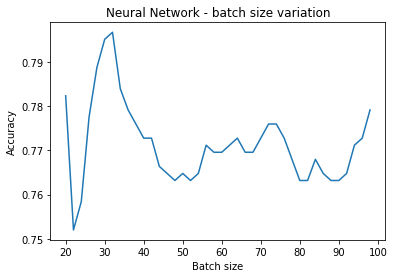

In [6]:
plt.title('Neural Network - batch size variation')
plt.plot(qq,acc)
plt.xlabel('Batch size')
plt.ylabel('Accuracy')
plt.show()